In [285]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import sklearn as sk
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import matplotlib as mpl

In [286]:
url = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv'
vacc_covid = pd.read_csv(url)
vacc_covid.head()

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0


In [287]:
italy_vacc = vacc_covid[vacc_covid['location'].str.contains('Italy')]
italy_vacc

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
11741,Italy,ITA,2020-12-27,7217.0,7217.0,NaN,NaN,NaN,0.01,0.01,NaN,NaN
11742,Italy,ITA,2020-12-28,8646.0,8646.0,NaN,1429.0,1429.0,0.01,0.01,NaN,24.0
11743,Italy,ITA,2020-12-29,9661.0,9661.0,NaN,1015.0,1222.0,0.02,0.02,NaN,20.0
11744,Italy,ITA,2020-12-30,14392.0,14392.0,NaN,4731.0,2392.0,0.02,0.02,NaN,40.0
11745,Italy,ITA,2020-12-31,39888.0,39888.0,NaN,25496.0,8168.0,0.07,0.07,NaN,135.0
...,...,...,...,...,...,...,...,...,...,...,...,...
11904,Italy,ITA,2021-06-08,39513096.0,27128236.0,13405826.0,572267.0,554740.0,65.35,44.87,22.17,9175.0
11905,Italy,ITA,2021-06-09,40094409.0,27592596.0,13560724.0,581313.0,579133.0,66.31,45.64,22.43,9578.0
11906,Italy,ITA,2021-06-10,40707777.0,28082548.0,13716619.0,613368.0,582217.0,67.33,46.45,22.69,9629.0
11907,Italy,ITA,2021-06-11,41301322.0,28549633.0,13866303.0,593545.0,577877.0,68.31,47.22,22.93,9558.0


In [288]:
italy_vacc.shape

(168, 12)

In [289]:
italy_vacc.index

Int64Index([11741, 11742, 11743, 11744, 11745, 11746, 11747, 11748, 11749,
            11750,
            ...
            11899, 11900, 11901, 11902, 11903, 11904, 11905, 11906, 11907,
            11908],
           dtype='int64', length=168)

In [290]:
jkjk = italy_vacc.groupby('date')['daily_vaccinations'].max().sort_values().tail(2).dropna()
#italy_vacc['daily_vaccinations'].max()
jkjk

date
2021-06-10    582217.0
Name: daily_vaccinations, dtype: float64

In [291]:
italy_vacc.loc[:,['location','date','daily_vaccinations']].head(3)

,location,date,daily_vaccinations
11741,Italy,2020-12-27,NaN
11742,Italy,2020-12-28,1429.0
11743,Italy,2020-12-29,1222.0


In [292]:
#italy_vacc = italy_vacc[italy_vacc['daily_vaccinations'].notna()]
#italy_vacc


In [293]:
pp100 = italy_vacc['people_vaccinated_per_hundred'].dropna()
print("solution as function from numpy: ",len(pp100) / np.sum(1.0/pp100))

solution as function from numpy:  0.4459039078203686


In [294]:
italy_vacc['daily_vaccinations'].dropna()

11742      1429.0
11743      1222.0
11744      2392.0
11745      8168.0
11746      8747.0
           ...   
11904    554740.0
11905    579133.0
11906    582217.0
11907    577877.0
11908    563665.0
Name: daily_vaccinations, Length: 167, dtype: float64

In [295]:
print("median: ", italy_vacc['daily_vaccinations'].median())
print("mean: " , italy_vacc['daily_vaccinations'].mean())


median:  187421.0
mean:  240182.874251497


In [296]:
italy_vacc.isnull().sum()

location                                0
iso_code                                0
date                                    0
total_vaccinations                      0
people_vaccinated                       0
people_fully_vaccinated                21
daily_vaccinations_raw                  1
daily_vaccinations                      1
total_vaccinations_per_hundred          0
people_vaccinated_per_hundred           0
people_fully_vaccinated_per_hundred    21
daily_vaccinations_per_million          1
dtype: int64

In [297]:
italy_in = vacc_covid[vacc_covid['location'].str.contains('Italy')]
italy_in.isnull().sum()

location                                0
iso_code                                0
date                                    0
total_vaccinations                      0
people_vaccinated                       0
people_fully_vaccinated                21
daily_vaccinations_raw                  1
daily_vaccinations                      1
total_vaccinations_per_hundred          0
people_vaccinated_per_hundred           0
people_fully_vaccinated_per_hundred    21
daily_vaccinations_per_million          1
dtype: int64

In [298]:
italy_in[italy_in['daily_vaccinations'].isnull() == True]


,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
11741,Italy,ITA,2020-12-27,7217.0,7217.0,NaN,NaN,NaN,0.01,0.01,NaN,NaN


<ipython-input-299-52fdda3ceaeb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  italy_in['daily_vaccinations'] = italy_in['daily_vaccinations'].fillna(x)


,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
11741,Italy,ITA,2020-12-27,7217.0,7217.0,NaN,NaN,240182.874251,0.01,0.01,NaN,NaN
11742,Italy,ITA,2020-12-28,8646.0,8646.0,NaN,1429.0,1429.000000,0.01,0.01,NaN,24.0
11743,Italy,ITA,2020-12-29,9661.0,9661.0,NaN,1015.0,1222.000000,0.02,0.02,NaN,20.0
11744,Italy,ITA,2020-12-30,14392.0,14392.0,NaN,4731.0,2392.000000,0.02,0.02,NaN,40.0
11745,Italy,ITA,2020-12-31,39888.0,39888.0,NaN,25496.0,8168.000000,0.07,0.07,NaN,135.0
...,...,...,...,...,...,...,...,...,...,...,...,...
11904,Italy,ITA,2021-06-08,39513096.0,27128236.0,13405826.0,572267.0,554740.000000,65.35,44.87,22.17,9175.0
11905,Italy,ITA,2021-06-09,40094409.0,27592596.0,13560724.0,581313.0,579133.000000,66.31,45.64,22.43,9578.0
11906,Italy,ITA,2021-06-10,40707777.0,28082548.0,13716619.0,613368.0,582217.000000,67.33,46.45,22.69,9629.0
11907,Italy,ITA,2021-06-11,41301322.0,28549633.0,13866303.0,593545.0,577877.000000,68.31,47.22,22.93,9558.0


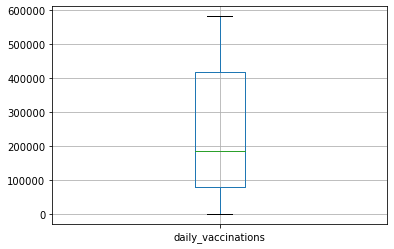

In [299]:
boxplot = italy_in.boxplot(column=['daily_vaccinations'])
x = italy_in['daily_vaccinations'].mean()
italy_in['daily_vaccinations'] = italy_in['daily_vaccinations'].fillna(x)
italy_in

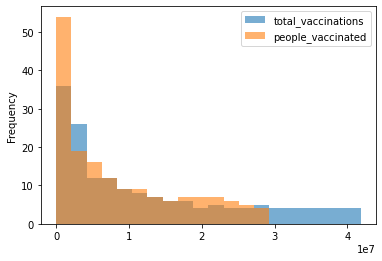

In [300]:
italy_in[['total_vaccinations','people_vaccinated']].plot.hist(bins=20, alpha=0.6)

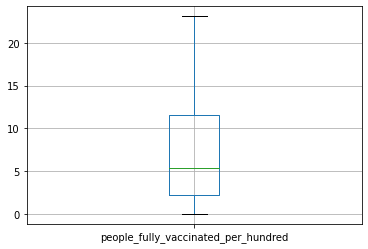

In [301]:
boxplot = italy_in.boxplot(column=['people_fully_vaccinated_per_hundred'])

In [302]:
italy_in['date'] = pd.to_datetime(italy_in.date)
italy_in['month'] = pd.DatetimeIndex(italy_in.date).month
temp = italy_in.groupby('month')[['people_vaccinated_per_hundred','daily_vaccinations']].max()
temp

<ipython-input-302-74e1afa6979f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  italy_in['date'] = pd.to_datetime(italy_in.date)
<ipython-input-302-74e1afa6979f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  italy_in['month'] = pd.DatetimeIndex(italy_in.date).month


,people_vaccinated_per_hundred,daily_vaccinations
month,,
1,2.28,84908.000000
2,4.91,114945.000000
3,11.92,251736.000000
4,23.55,404732.000000
5,39.14,510327.000000
6,47.92,582217.000000
12,0.07,240182.874251


In [303]:
temp.sort_values('people_vaccinated_per_hundred')

,people_vaccinated_per_hundred,daily_vaccinations
month,,
12,0.07,240182.874251
1,2.28,84908.000000
2,4.91,114945.000000
3,11.92,251736.000000
4,23.55,404732.000000
5,39.14,510327.000000
6,47.92,582217.000000


1%( .10 )מהו הסרטון עם מספר הצפיות הגבוה ביותר? מתי הוא פורסם ובכמה צפיות זכה?
עליכם להציג אך ורק את הנתונים הללו: time_publish, views, title
2%( .10 )הציגו את שלושת הערוצים עם מספר הצפיות הגבוה ביותר. עליכם להציג אך ורק את 
הנתונים הללו: views, title _channel( שלוש שורות שלהם(. 
 ?likes, dislikes, views, comment_count ה מספר בין spearman פ"ע הקורלציה מהי( 20%( .3
 .3 סעיף עבור heatmap צרו( 10%( .4
5%( .20 )צרו scatterplot להראות את שתי הקורלציות הכי חזקות שמצאתם בסעיף 3( במידה ויש 
תיקו, ביחרו שתיים מתוך ההכי חזקות(. 
6%( .20 )הציגו את כמות הצפיות (views (בכל קטגוריה (id_category (עבור השנים 2018-2017 .אין 
להציג מידע נוסף )למשל – לא להציג גם את הצפיות ב2016 ,או את כמות ההערות(. רמז: תחילה 
עליכם לחלץ את השנה ולשמור אותה בעמודה נפרדת. אחר כך מומלץ להשתמש ב table pivot .
7%( .10 )נקודות מתנה. יורדו במידה ויוגש ערעור על הציון.

In [304]:
youtubeData = pd.read_csv('youtube_US_short.csv')
youtubeData.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [305]:
youtubeData.loc[:,['trending_date','title','publish_time','views']]

,trending_date,title,publish_time,views
0,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,2017-11-13T17:13:01.000Z,748374
1,17.14.11,The Trump Presidency: Last Week Tonight with J...,2017-11-13T07:30:00.000Z,2418783
2,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",2017-11-12T19:05:24.000Z,3191434
3,17.14.11,Nickelback Lyrics: Real or Fake?,2017-11-13T11:00:04.000Z,343168
4,17.14.11,I Dare You: GOING BALD!?,2017-11-12T18:01:41.000Z,2095731
...,...,...,...,...
12840,18.19.01,ASMR Lushful Spa Treatment ✨ Facial and Massage,2018-01-17T03:24:25.000Z,785084
12841,18.19.01,La de da de da de da de day oh,2018-01-16T20:34:48.000Z,2297342
12842,18.19.01,How to be a Pisces,2018-01-17T23:28:57.000Z,112969
12843,18.19.01,I Bought The $80 Starbucks Mug...,2018-01-17T22:33:30.000Z,275653


In [306]:
maxv = youtubeData['views'].max()

In [307]:
newline = youtubeData[youtubeData['views']== maxv]
newline

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
6181,FlsCjmMhFmw,17.14.12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",149376127,3093544,1643059,810698,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p..."


In [308]:
newline.loc[:,['trending_date','title','publish_time','views']]

,trending_date,title,publish_time,views
6181,17.14.12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,2017-12-06T17:58:51.000Z,149376127


In [309]:
youtubeData.groupby('channel_title')[['views']].max().head(3)

,views
channel_title,
12 News,92327
1theK (원더케이),2827100
20th Century Fox,12382809


In [310]:
ncorr = youtubeData[['views','likes','dislikes','comment_count']]
ncorr.corr(method = 'spearman')

,views,likes,dislikes,comment_count
views,1.000000,0.877789,0.866979,0.840532
likes,0.877789,1.000000,0.801154,0.881849
dislikes,0.866979,0.801154,1.000000,0.843331
comment_count,0.840532,0.881849,0.843331,1.000000


,views,likes,dislikes,comment_count
views,1.000000,0.877789,0.866979,0.840532
likes,0.877789,1.000000,0.801154,0.881849
dislikes,0.866979,0.801154,1.000000,0.843331
comment_count,0.840532,0.881849,0.843331,1.000000


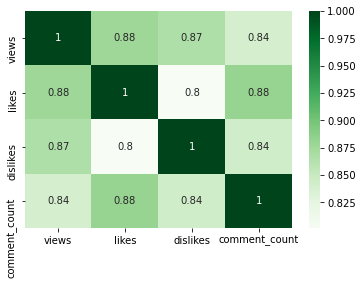

In [311]:
features = ['views','likes','dislikes','comment_count']
ncorr = youtubeData[features].corr(method = 'spearman')
sns.heatmap(data=ncorr,cmap='Greens', annot=True)
ncorr


likes  views            0.877789
       comment_count    0.881849
dtype: float64
MultiIndex([('likes',         'views'),
            ('likes', 'comment_count')],
           )


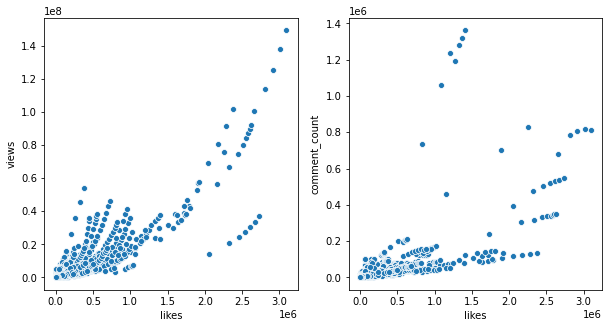

In [312]:
fig,axes = plt.subplots(1,2, figsize = (10,5))#split the plots
cor_plt = ncorr.unstack().sort_values()[-7:-5]#orgenize the data from the smallest to the biggest and get the max valuse that are not 1 and repeat on them self
title_corr = pd.Series.keys(cor_plt)#we did it in order to make the write titles for the axes
print(cor_plt)
print(title_corr)
plt1 = sns.scatterplot(ax=axes[0],data=youtubeData,x=title_corr[0][0],y=title_corr[0][1])
plt2 = sns.scatterplot(ax=axes[1],data=youtubeData,x=title_corr[1][0],y=title_corr[1][1])

In [313]:
#youtubeData['publish_time'] = pd.to_datetime(youtubeData['publish_time'],format='%Y-%m-%d')
youtubeData['year'] = pd.DatetimeIndex(youtubeData.publish_time).year
newdatata = youtubeData[(youtubeData.year == 2017)| (youtubeData.year == 2018)]
neadatt = newdatata.pivot_table('views',index=['category_id'],columns=['year'],aggfunc= 'sum')
neadatt

year,2017,2018
category_id,,
1,8.654615e+08,144072937.0
2,7.885352e+07,8047346.0
10,4.504741e+09,839810930.0
15,1.442459e+08,32629265.0
17,3.812432e+08,61660329.0
19,5.429144e+07,7583452.0
20,5.035442e+07,84176667.0
22,7.018258e+08,67849434.0
23,1.130782e+09,197147385.0


In [314]:
nba_Data = pd.read_csv('nba.csv')
nba_Data

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8.0,PG,26.0,6-3,203.0,Butler,2433333.0
454,Raul Neto,Utah Jazz,25.0,PG,24.0,6-1,179.0,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21.0,C,26.0,7-3,256.0,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24.0,C,26.0,7-0,231.0,Kansas,947276.0


In [315]:
nba_Data = nba_Data.dropna()
newww = nba_Data[['Age','Height','Weight','Salary']].head(3)


In [316]:
def parse_ht(ht):
    ht_ = ht.split("-")
    ft_ = float(ht_[0])
    in_ = float(ht_[1])
    return (12*ft_) + in_
nba_Data["Height"]=nba_Data["Height"].apply(lambda x:parse_ht(x))

<ipython-input-316-711268949dad>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nba_Data["Height"]=nba_Data["Height"].apply(lambda x:parse_ht(x))


In [317]:
nba_Data

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,74.0,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,78.0,235.0,Marquette,6796117.0
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,77.0,185.0,Georgia State,1148640.0
6,Jordan Mickey,Boston Celtics,55.0,PF,21.0,80.0,235.0,LSU,1170960.0
7,Kelly Olynyk,Boston Celtics,41.0,C,25.0,84.0,238.0,Gonzaga,2165160.0
...,...,...,...,...,...,...,...,...,...
449,Rodney Hood,Utah Jazz,5.0,SG,23.0,80.0,206.0,Duke,1348440.0
451,Chris Johnson,Utah Jazz,23.0,SF,26.0,78.0,206.0,Dayton,981348.0
452,Trey Lyles,Utah Jazz,41.0,PF,20.0,82.0,234.0,Kentucky,2239800.0
453,Shelvin Mack,Utah Jazz,8.0,PG,26.0,75.0,203.0,Butler,2433333.0


In [318]:
onedat = nba_Data[['Age','Height','Weight','Salary']]
onedat

,Age,Height,Weight,Salary
0,25.0,74.0,180.0,7730337.0
1,25.0,78.0,235.0,6796117.0
3,22.0,77.0,185.0,1148640.0
6,21.0,80.0,235.0,1170960.0
7,25.0,84.0,238.0,2165160.0
...,...,...,...,...
449,23.0,80.0,206.0,1348440.0
451,26.0,78.0,206.0,981348.0
452,20.0,82.0,234.0,2239800.0
453,26.0,75.0,203.0,2433333.0


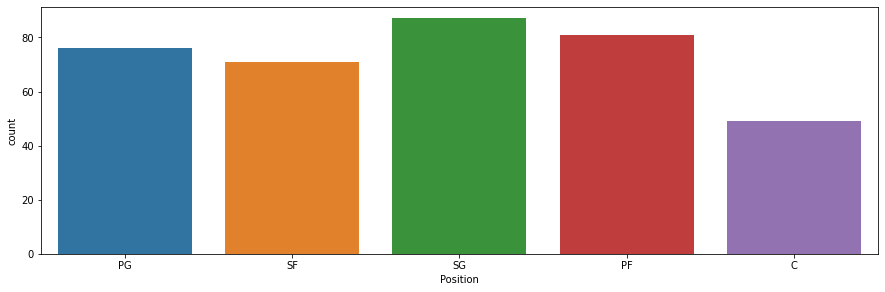

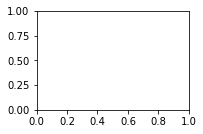

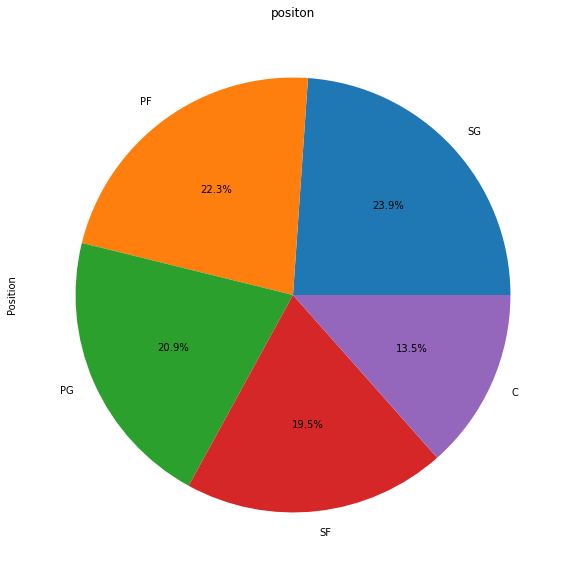

In [319]:
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
sns.countplot(x="Position", data=nba_Data)
plt.show()
plt.subplot(2,2,2)
plt.figure(figsize=(15,10))
plt.title("positon")
nba_Data['Position'].value_counts().plot.pie(autopct="%1.1f%%")


In [320]:

# pos = NBA_data['Position']
# fig, axes = plt.subplots(nrows=1, ncols=2)
# sns.countplot(ax=axes[1],x="Position", hue="Position",  data=NBA_data)
# pos.value_counts().plot.pie(ax=axes[0],figsize=(10,5),autopct="%1.1f%%")

In [321]:
from sklearn.tree import DecisionTreeRegressor

In [322]:
nba_features = ['Age','Height','Weight']
X = onedat[nba_features]
y = onedat['Salary']
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.3, random_state=42)
print("y test:")
print(y_test.head())
print("x train:")
print(X_train.head())
model1 = DecisionTreeRegressor(random_state=42)
model1.fit(X_train, y_train)

y test:
232    2085671.0
42     1636842.0
19     6300000.0
435    3075880.0
71     3553917.0
Name: Salary, dtype: float64
x train:
      Age  Height  Weight
332  22.0    79.0   232.0
285  26.0    78.0   220.0
191  26.0    75.0   208.0
24   21.0    83.0   200.0
181  33.0    81.0   245.0


DecisionTreeRegressor(random_state=42)

In [323]:
model1 = DecisionTreeRegressor(random_state=42)
model1.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [324]:
def mse(a,b):
    return np.sqrt(np.square(a-b).mean())
test_pred = model1.predict(X_test)
print("The predictions are")
print(test_pred)
print("MSE: {:.3f}".format(mse(y_test.values,test_pred)))

The predictions are
[ 2500000.           947276.          5378974.         16407500.
  1252440.          7070730.          2814000.           947276.
  3156600.         10050000.           947276.          2869440.
  1535880.          5000000.          2500000.           525093.
   947276.          8500000.         22875000.          1140240.
  1015421.          5000000.          2109294.          1779866.66666667
  2170465.           981348.          6331404.          2612520.
  1779866.66666667  2000000.          3344000.         18671659.
  2525160.           306527.          1035000.          2612520.
 20093064.          6500000.          3156600.          1000000.
  9463484.          4290000.         15851950.          3036927.
  1394640.           947276.           981348.          3431040.
  1007026.          5703600.          1319066.66666667  4000000.
  4000000.          1100000.         15851950.          4775000.
  5152440.          1394640.         11235955.         1968900

In [325]:
nba2 = nba_Data[['Age','Height','Weight','Salary','Position']]
nba2['Position'] = nba2['Position'].astype('category').cat.codes
nba2.head()

<ipython-input-325-90b84006eef4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nba2['Position'] = nba2['Position'].astype('category').cat.codes


,Age,Height,Weight,Salary,Position
0,25.0,74.0,180.0,7730337.0,2
1,25.0,78.0,235.0,6796117.0,3
3,22.0,77.0,185.0,1148640.0,4
6,21.0,80.0,235.0,1170960.0,1
7,25.0,84.0,238.0,2165160.0,0


In [326]:
nba_features = ['Age','Height','Weight','Position']
X = nba2[nba_features]
y = nba2['Salary']
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.3, random_state=42)
print("y test:")
print(y_test.head())
print("x train:")
print(X_train.head())
model2 = DecisionTreeRegressor(random_state=42)
model2.fit(X_train, y_train)

y test:
232    2085671.0
42     1636842.0
19     6300000.0
435    3075880.0
71     3553917.0
Name: Salary, dtype: float64
x train:
      Age  Height  Weight  Position
332  22.0    79.0   232.0         3
285  26.0    78.0   220.0         4
191  26.0    75.0   208.0         2
24   21.0    83.0   200.0         1
181  33.0    81.0   245.0         0


DecisionTreeRegressor(random_state=42)

In [327]:
test_pred = model2.predict(X_test)
print("The predictions are")
print(test_pred)
print("MSE: {:.3f}".format(mse(y_test.values,test_pred)))

The predictions are
[ 2500000.         10449438.          5378974.           947276.
  1252440.          5152440.         10449438.         10449438.
  3156600.         10050000.           947276.          5758680.
   845059.          5000000.          2500000.          1015421.
   947276.         17120106.         15514031.           525093.
  1015421.          5000000.          2109294.          1779866.66666667
  2100000.           981348.          2056920.          1000000.
  2000000.          2000000.          3344000.         22875000.
  1147276.          4000000.           295327.          2612520.
 20093064.          6980802.          3156600.          2357760.
  1678600.          4290000.          1007026.           947276.
  5758680.           947276.           981348.          3156600.
  3431040.          5703600.          1678600.           947276.
  4000000.           700000.          1159680.         10449438.
  5152440.          2239800.         10050000.         1968900

In [328]:
model2 = DecisionTreeRegressor(random_state=42)
model2.fit(X_train,y_train)
print("Depth:",model2.get_depth())
print("MSE: {:.3f}".format(mse(y_test.values,test_pred)))

Depth: 16
MSE: 6195968.085


In [329]:
model2 = DecisionTreeRegressor(max_depth=15,random_state=42)
model2.fit(X_train,y_train)
print("Depth:",model2.get_depth())
print("MSE: {:.3f}".format(mse(y_test.values,test_pred)))

Depth: 15
MSE: 6195968.085


In [330]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse

In [331]:
url = 'https://raw.githubusercontent.com/nlihin/data-analytics/main/datasets/avocado.csv'
avocado_data = pd.read_csv(url)
avocado_data.head()

,Unnamed: 0,Date,AveragePrice,total_sold,small_sold,large_sold,sma,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27/12/2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20/12/2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13/12/2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06/12/2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29/11/2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [332]:
import pandas as pd
import numpy as np
import os
from datetime import date # get python datetime
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error as mse

In [333]:
url = 'https://raw.githubusercontent.com/nlihin/data-analytics/main/datasets/avocado.csv'
data = pd.read_csv(url)
data.head()

,Unnamed: 0,Date,AveragePrice,total_sold,small_sold,large_sold,sma,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27/12/2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20/12/2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13/12/2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06/12/2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29/11/2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [334]:
data['type_cat'] = data['type'].astype('category').cat.codes
data['region_cat'] = data['region'].astype('category').cat.codes
features = ['Total Bags', 'AveragePrice', 'type_cat', 'region_cat']
X = data[features]
y = data['total_sold']
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.3, random_state=42)
X_train.head()#for the train

,Total Bags,AveragePrice,type_cat,region_cat
8704,468944.92,0.95,0,18
5271,40761.68,1.14,0,47
7654,97087.55,1.17,0,38
2417,892288.82,0.99,0,46
11906,3086.35,1.58,1,53


In [340]:
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train,y_train)

DecisionTreeRegressor(random_state=42)

In [341]:
def eval(x_test,y_test,model):
    pred = model.predict(x_test)
    print("MSE: {:.3f}".format(mse(pred,y_test,squared=False)))
print("Depth:",model.get_depth())
eval(X_test,y_test,model)

Depth: 38
MSE: 578386.423


In [342]:
model = DecisionTreeRegressor(max_depth=4,random_state=42)
model.fit(X_train,y_train)
print("Depth:",model.get_depth())
eval(X_test,y_test,model)

Depth: 4
MSE: 626290.454


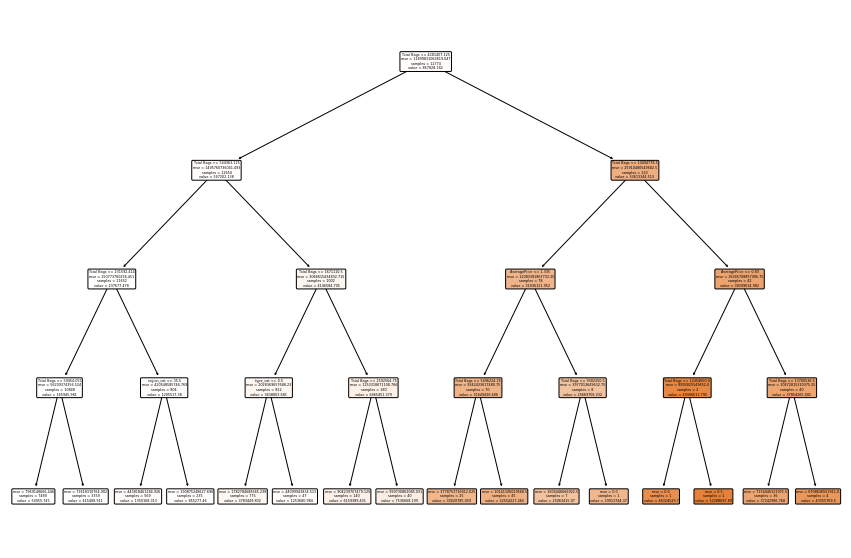

In [343]:
import sklearn.tree as tree
def plot_tree(tree_model,feat,size=(15,10)):
    fig = plt.figure(figsize=size)
    tree.plot_tree(tree_model, 
                   feature_names = feat, 
                   filled=True, 
                   rounded = True)  
    plt.show
plot_tree(model,features)

In [374]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt    

In [375]:
insurance = pd.read_csv("https://raw.githubusercontent.com/ShaiYona/Data-Science2021B/main/tirgulim/tirgul10/insurance.csv")
insurance.tail(6)

,age,sex,bmi,children,smoker,region,expenses
1332,52,female,44.7,3,no,southwest,11411.69
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [376]:
insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

הצג הסטוגרמה של התפלגות ההוצאות לפי נדבקים:


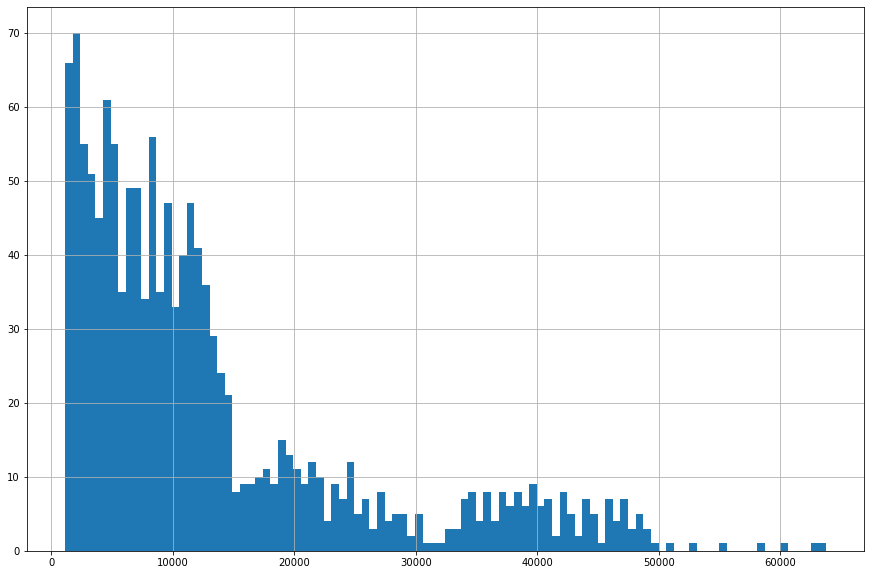

In [501]:

insurance['expenses'].hist(bins= 100 , figsize = (15,10))

הצג כמות מעשניפ לפי מגדר:

In [504]:
insurance['male'] = insurance['sex']== 'male' 
insurance['female'] = insurance['sex']== 'female'
insurance
dumm = pd.get_dummies(insurance, columns=['sex','male','female','smoker'])
my_piv = insurance.pivot_table(index=['smoker'],values=['male','female'], aggfunc= 'sum')
my_piv

,female,male
smoker,,
no,547.0,517.0
yes,115.0,159.0


In [512]:
# sex_splited = pd.get_dummies(insurance['sex'])#Makes sex numeric
# insurance = pd.concat([insurance,sex_splited],axis=1)#concat between 2 data frames
# insurance.groupby('smoker')['female','male'].sum()
opop = insurance.groupby(['smoker','sex']).size().unstack()
opop

sex,female,male
smoker,,
no,547,517
yes,115,159


הצג דיאגרמת פאי לפי מגדר?

<function matplotlib.pyplot.show(*args, **kw)>

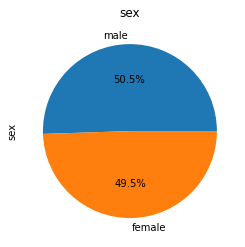

In [458]:
plt.title('sex')
#Convert column to graphical display of pie
insurance['sex'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show

הצג דיאגרמה בה מוצגים אחוז המעשנים בכל מגדר

<function matplotlib.pyplot.show(*args, **kw)>

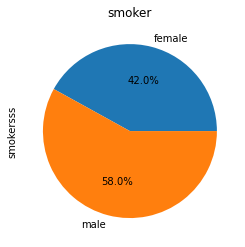

In [459]:
insurance['smokersss'] = insurance['smoker'].astype('category').cat.codes
#data['region_cat'] = data['region'].astype('category').cat.codes

plt.title('smoker')
insurance.groupby('sex')['smokersss'].sum().plot.pie(autopct="%1.1f%%")
plt.show

### 6.	הצג בטבלה אחת את ממוצע ההוצאות לפי מגדר ועישון

In [460]:
newpiv = insurance.pivot_table(index=['smoker','sex'],values=['expenses'], aggfunc= 'mean')
newpiv
insurance.pivot_table(values='expenses',index='smoker',columns='sex')

sex,female,male
smoker,,
no,8762.297367,8087.204971
yes,30678.996261,33042.006226


### 7.	present corrolation between: age,bmi,children,expenses,smoker Using Pearson creteria.

In [461]:

data1 = insurance[['age','bmi','children','expenses','smokersss']]
data1.corr()

,age,bmi,children,expenses,smokersss
age,1.000000,0.109341,0.042469,0.299008,-0.025019
bmi,0.109341,1.000000,0.012645,0.198576,0.003968
children,0.042469,0.012645,1.000000,0.067998,0.007673
expenses,0.299008,0.198576,0.067998,1.000000,0.787251
smokersss,-0.025019,0.003968,0.007673,0.787251,1.000000


# 8.	הצג תרשים של ההוצאות ביחס לגיל ולמגדר

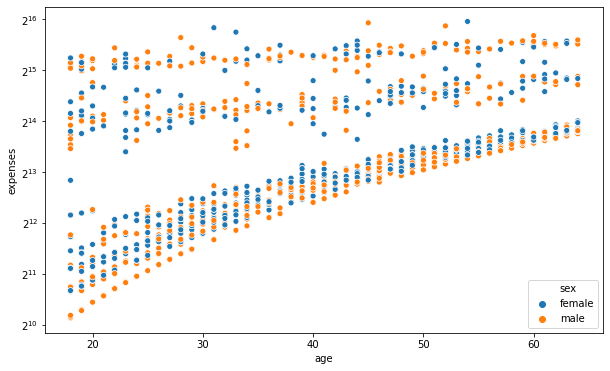

In [496]:
plt.figure(figsize = (10,6))
sns.scatterplot(data=insurance, x='age', y='expenses',hue= "sex").set_yscale('log', basey = 2)
#plt.xlim(15,50)
#plt.ylim(0,4000)

### 9.	הצג תרשים של ההוצאות ביחס לגיל ולקריטריון האם מעשן

,age,sex,bmi,children,smoker,region,expenses,male,female,smokersss
0,19,female,27.9,0,yes,southwest,16884.92,False,True,1
1,18,male,33.8,1,no,southeast,1725.55,True,False,0
2,28,male,33.0,3,no,southeast,4449.46,True,False,0
3,33,male,22.7,0,no,northwest,21984.47,True,False,0
4,32,male,28.9,0,no,northwest,3866.86,True,False,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55,True,False,0
1334,18,female,31.9,0,no,northeast,2205.98,False,True,0
1335,18,female,36.9,0,no,southeast,1629.83,False,True,0
1336,21,female,25.8,0,no,southwest,2007.95,False,True,0


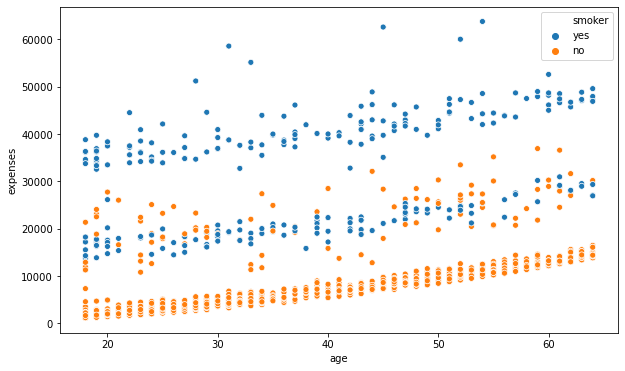

In [467]:
plt.figure(figsize = (10,6))
sns.scatterplot(data=insurance, x='age', y='expenses',hue= "smoker",)
insurance

In [464]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as mse

In [469]:
insurance['sexxx'] = insurance['sex'].astype('category').cat.codes
insurance


,age,sex,bmi,children,smoker,region,expenses,male,female,smokersss,sexxx
0,19,female,27.9,0,yes,southwest,16884.92,False,True,1,0
1,18,male,33.8,1,no,southeast,1725.55,True,False,0,1
2,28,male,33.0,3,no,southeast,4449.46,True,False,0,1
3,33,male,22.7,0,no,northwest,21984.47,True,False,0,1
4,32,male,28.9,0,no,northwest,3866.86,True,False,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55,True,False,0,1
1334,18,female,31.9,0,no,northeast,2205.98,False,True,0,0
1335,18,female,36.9,0,no,southeast,1629.83,False,True,0,0
1336,21,female,25.8,0,no,southwest,2007.95,False,True,0,0


### 10.	אמן מודל החוזה הוצאות בהינתן: גיל, מגדר, bmi,עישון. הערך את המודל.

אמן מודל החוזה הוצאות בהינתן גיל מגדר עישון וביאמאיי

In [472]:
#insurance['sex_cat'] = features['sex'].astype('category').cat.codes
features = ['sexxx', 'smokersss', 'bmi', 'age']
X = insurance[features]
y = insurance['expenses']
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.3, random_state=42)
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train,y_train)


DecisionTreeRegressor(random_state=42)

In [473]:
def eval(x_test,y_test,model):
    pred = model.predict(x_test)
    print("MSE: {:.3f}".format(mse(pred,y_test,squared=False)))
print("Depth:",model.get_depth())
eval(X_test,y_test,model)


Depth: 19
MSE: 6688.745


In [480]:
model = DecisionTreeRegressor(max_depth=4,random_state=42)
model.fit(X_train,y_train)
print("Depth:",model.get_depth())
eval(X_test,y_test,model)


Depth: 4
MSE: 4569.812


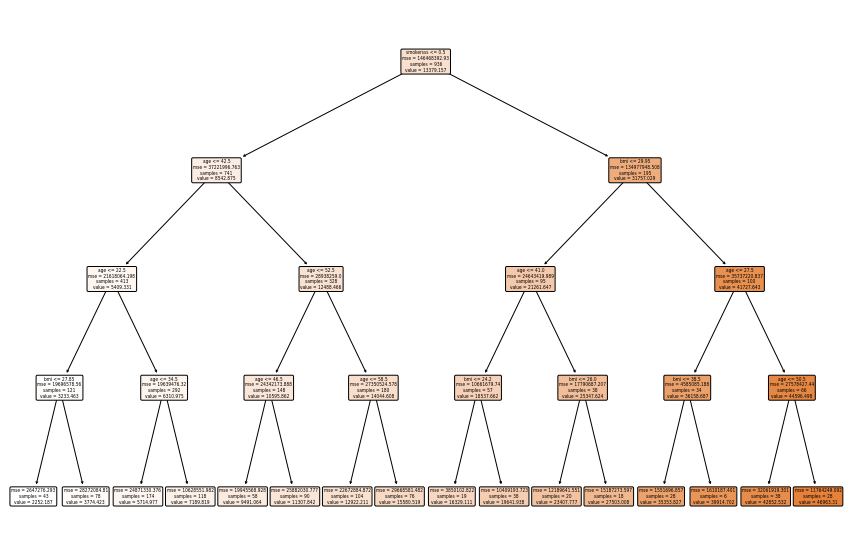

In [481]:
import sklearn.tree as tree
def plot_tree(tree_model,feat,size=(15,10)):
    fig = plt.figure(figsize=size)
    tree.plot_tree(tree_model, 
                   feature_names = feat, 
                   filled=True, 
                   rounded = True)  
    plt.show
plot_tree(model,features)
